In [6]:
import json
import matplotlib.pyplot as plt
from scipy.stats import iqr
import numpy as np
from matplotlib.ticker import StrMethodFormatter
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
#plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}')) # 2 decimal places

# use LateX fonts
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})


In [2]:
PARTICIPANTS_INFO = {}
x_phq = []
x_phq_male = []
x_phq_female = []

In [3]:


with open('extracted_feature_results/results.json', 'r') as jsonFile:
    PARTICIPANTS_INFO = json.load(jsonFile)
    #print(PARTICIPANTS_INFO)

In [4]:

for v in PARTICIPANTS_INFO.values():
    x_phq.append(int(v['phq_score']))
    if v['gender'] == 'male':
        x_phq_male.append(int(v['phq_score']))
    elif v['gender'] == 'female':
        x_phq_female.append(int(v['phq_score']))

def get_bins_for_hist(list_phq):
    print("tt", len(list_phq))
    bin_width = (2 * iqr(list_phq)) ** (-1/3) #bin-width based on freedman diaconis rule 
    bins = round((max(list_phq) - min(list_phq)) / bin_width)
    return bins

bins = get_bins_for_hist(x_phq)
bins_male = get_bins_for_hist(x_phq_male)
bins_female = get_bins_for_hist(x_phq_female)

tt 189
tt 102
tt 87


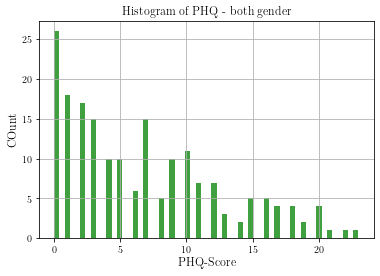

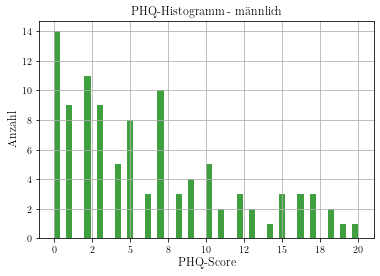

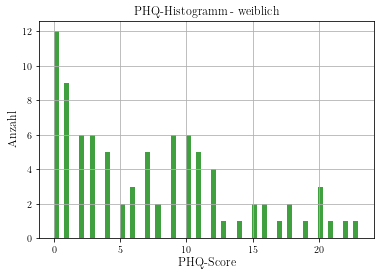

In [12]:
def plot_hist(list_phq, bins, x_label, y_label, plot_title):
    _, _, _ = plt.hist(list_phq, bins, facecolor='g', alpha=0.75)

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(plot_title)
    plt.grid(True)
    #plt.xticks(range(0, 25))
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places
    plt.savefig('filename.png', dpi=300)
    plt.show()

plot_hist(x_phq, bins, 'PHQ-Score', 'COunt', 'Histogram of PHQ - both gender')
plot_hist(x_phq_male, bins_male, 'PHQ-Score', 'Anzahl', 'PHQ-Histogramm - männlich')
x_phq_male.sort()
plot_hist(x_phq_female, bins_female, 'PHQ-Score', 'Anzahl', 'PHQ-Histogramm - weiblich')